THE DATA
the data has the following fields
 - 'gender' - male/female
 - 'race/ethnicity. - one of 5 combinations of race/ethnicity
 - 'parent_education_level' - highest education level of either parent
 - 'lunch' - wheather the student recieves free/reduced or standard lunch
 - 'test_prep_course' - wheather the student took the test preparation course
 - 'math' - exam score in math
 - 'reading' - exam score in reading
 - 'writing' - exam score in writing


Challenge
Create a report to answer the principles questions. include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the averages for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average score for students with/without
the test preparation course for differnt parental education levels (e.g. facted plots)
5. [Optional] The principle wants to know if kids who perform well on one subject also score well on the 
others. look at the correlation between scores
6. Summarize your findings.

In [1]:
#importing the modules
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# reading the data
df = pd.read_csv('exams.csv')

#taking a look at the first datapoints
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,free/reduced,completed,56,82,80
1,female,group D,some high school,standard,none,51,66,63
2,female,group C,high school,standard,none,86,89,88
3,male,group B,some high school,standard,none,85,81,74
4,male,group E,associate's degree,standard,completed,75,66,67


pleminary analysis of the data set
performing this analysis to find out what cleanup the data needs and understanding the resources i have to work with.

In [7]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.252000,70.182000,68.951000
std,15.210584,14.732207,15.305125
min,20.000000,25.000000,27.000000
25%,57.000000,61.000000,59.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


# Run Data Analysis

In [8]:
# 1. What are the average reading scores for students with/without the test preparation course?
df.groupby('test preparation course')[["reading score"]].mean()

,reading score
test preparation course,
completed,75.037901
none,67.646880


on average the students that take the test preparation course outperform in reading than those who didnt take the course

In [9]:
#2. what are the average scores for the different parental education levels?
p_average = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
p_average.sort_values('math score', ascending=False)

,math score,reading score,writing score
parental level of education,,,
bachelor's degree,70.819549,73.052632,73.706767
master's degree,70.543860,75.157895,74.298246
some college,70.241228,72.399123,71.412281
associate's degree,69.852459,72.934426,71.978142
high school,63.521053,66.789474,64.615789
some high school,61.937799,65.253589,63.071770


C:\Users\EDEMA6\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


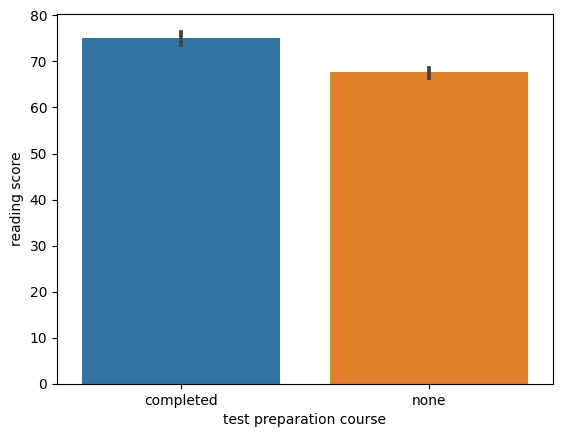

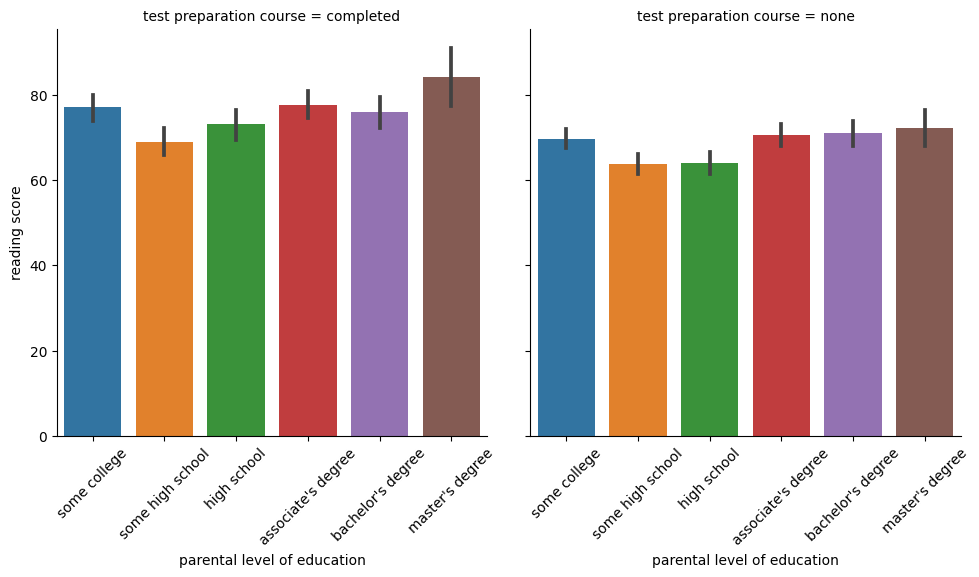

In [13]:
#3. create plots to visualize findings for question 1 and 2
#qn1 
sns.barplot(x='test preparation course', y='reading score', data=df)

#qn2
p_avg = sns.catplot(x='parental level of education', y='reading score', col='test preparation course', data=df, kind='bar')
p_avg.set_xticklabels(rotation=45)

4. Look at the effects within subgroups. compare the average scores for students with/without the test
preparation course for different parental education levels(e.g. faceted plots)

C:\Users\EDEMA6\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


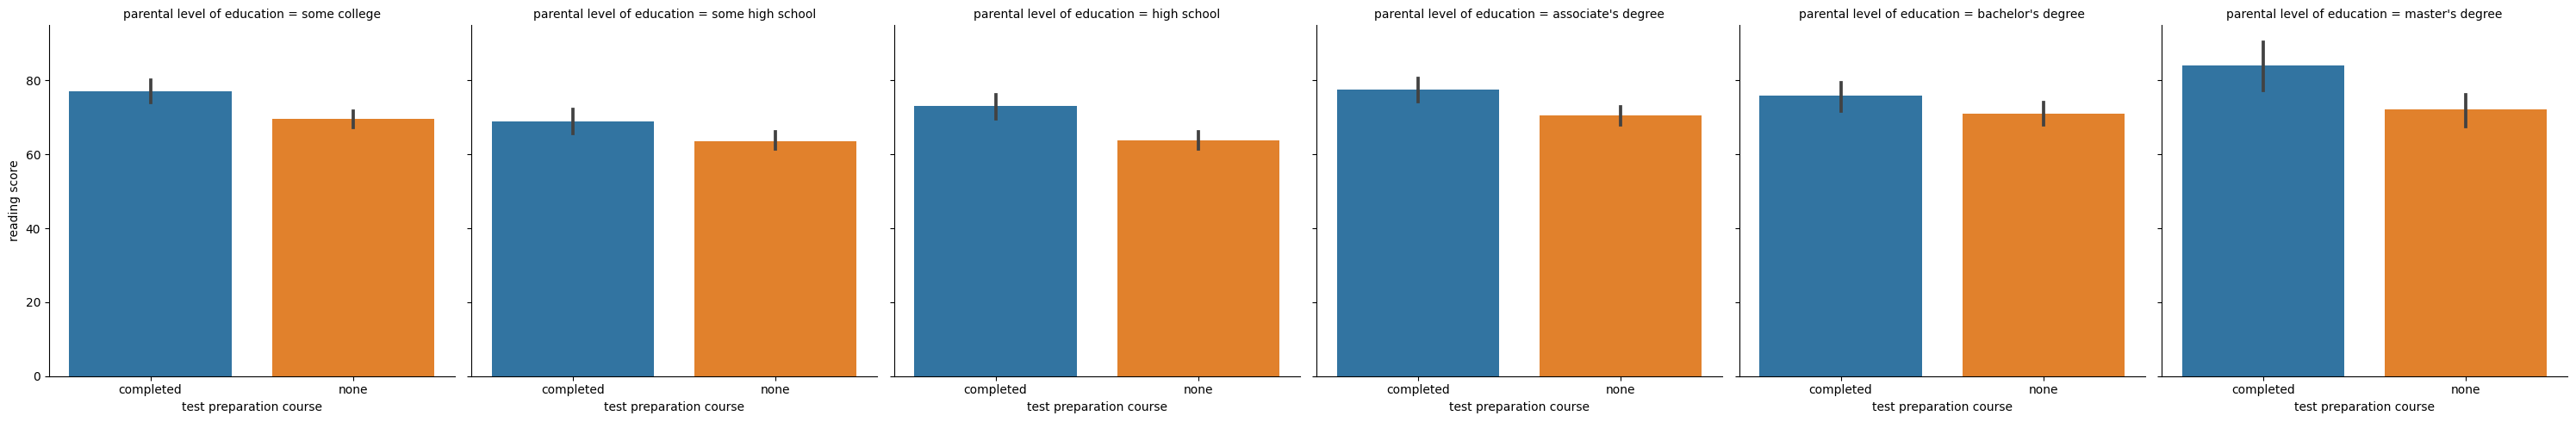

In [17]:
sns.catplot(x='test preparation course', y='reading score', col='parental level of education', data=df, kind='bar')

C:\Users\EDEMA6\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


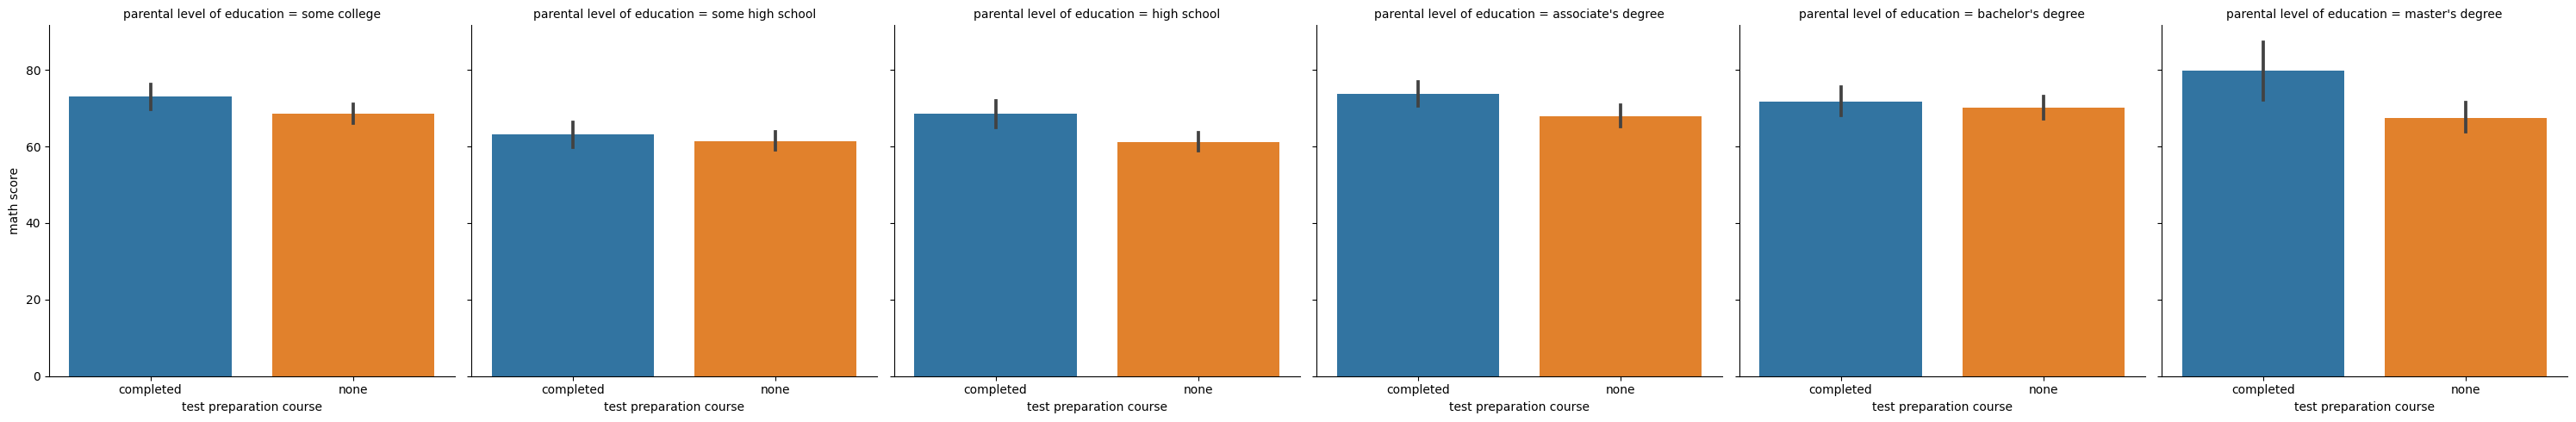

In [21]:
sns.catplot(x='test preparation course', y='math score',
            col='parental level of education', data=df, kind='bar')

C:\Users\EDEMA6\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


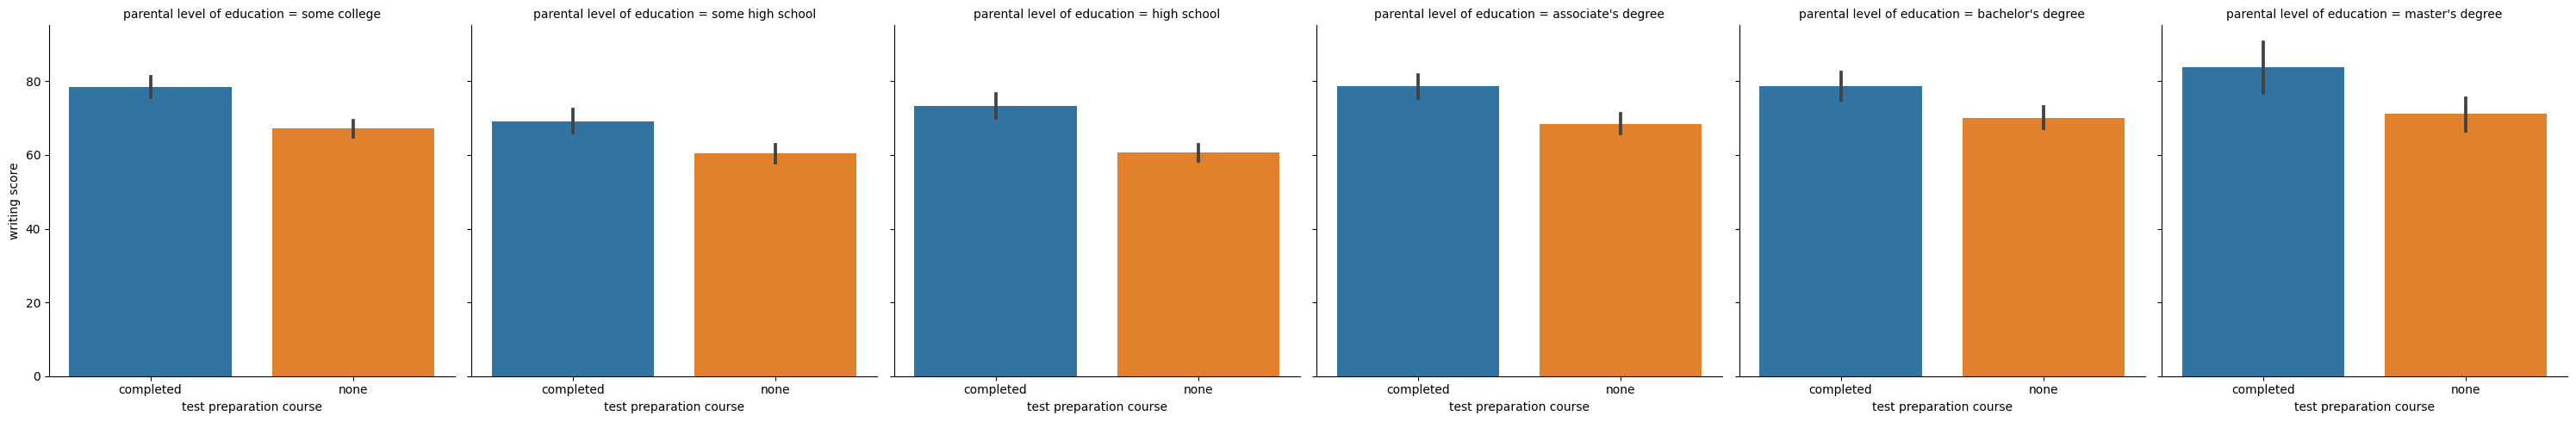

In [22]:
sns.catplot(x='test preparation course', y='writing score', col='parental level of education', data=df, kind='bar')

5. The principle wants to know if kids who perform well on the subject also score well on the others.
Look for correlation between scores.


In [26]:
df.groupby('test preparation course')[['reading score', 'writing score', 'math score']].mean()

,reading score,writing score,math score
test preparation course,,,
completed,75.037901,76.104956,70.609329
none,67.646880,65.216134,65.499239


In [27]:
df.sort_values(['reading score', 'writing score', 'math score'], ascending=False).head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
156,female,group E,master's degree,standard,completed,100,100,100
642,female,group E,master's degree,standard,none,100,100,100
751,female,group E,some college,standard,completed,100,100,100
779,female,group D,associate's degree,standard,completed,99,100,100
321,female,group E,associate's degree,standard,completed,98,100,100
138,female,group D,master's degree,standard,completed,97,100,100
534,female,group E,some college,standard,completed,97,100,100
479,female,group D,bachelor's degree,standard,completed,91,100,100
719,female,group D,associate's degree,standard,none,91,100,100
497,female,group E,associate's degree,standard,completed,90,100,100


on average students who perform well on one subject also perform well on other subjects.

# Summary